In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 

from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 

import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")

In [2]:

train= pd.read_csv("Train.csv")
test= pd.read_csv("test.csv")

In [3]:
train_original= train.copy()
test_original= test.copy()

# Dataset Structure and Content

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [7]:
#feature extraction

train['Datetime']= pd.to_datetime(train.Datetime, format="%d-%m-%Y %H:%M")
test['Datetime']= pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')

train_original['Datetime']= pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime']= pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')


In [8]:
    
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [9]:
train['day of week']=train['Datetime'].dt.dayofweek
temp= train['Datetime']

In [10]:

def applyer(row):
    if row.dayofweek == 5 or row.dayofweek ==6:
        return 1
    else:
        return 0
temp2= train['Datetime'].apply(applyer)
train['weekend']=temp2

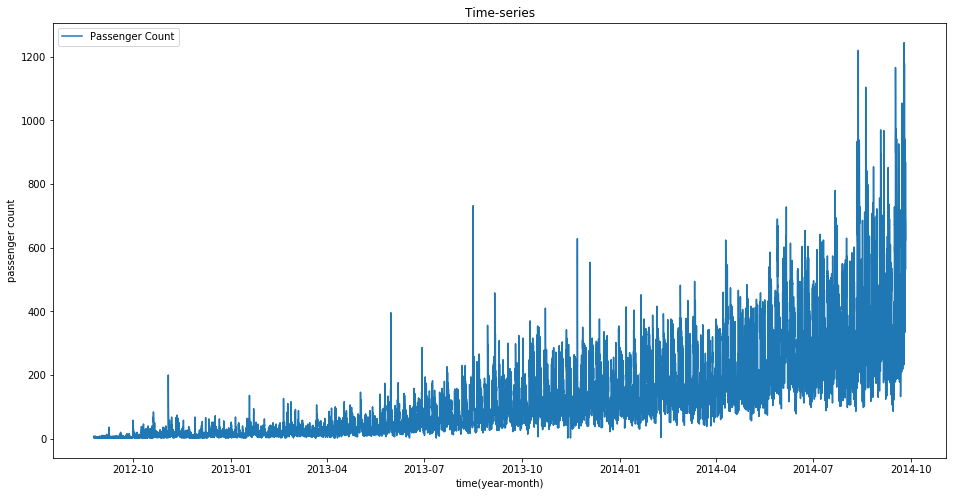

In [11]:

train.index= train['Datetime']  # indexing the datetime to get the time period on the x-axis.
df= train.drop('ID',1)
ts= df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time-series')
plt.xlabel("time(year-month)")
plt.ylabel("passenger count")
plt.legend(loc='best')

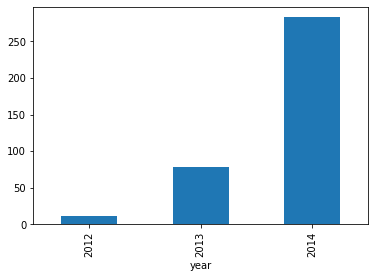

In [12]:
#Exploratory Analysis

train.groupby('year')['Count'].mean().plot.bar()

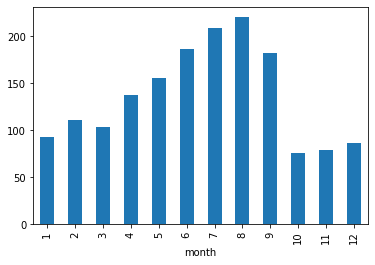

In [13]:
train.groupby('month')['Count'].mean().plot.bar()

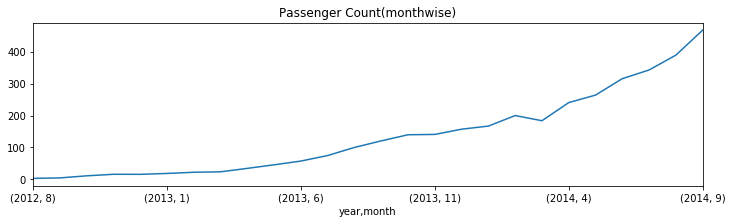

In [14]:

temp= train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(12,3), title= 'Passenger Count(monthwise)', fontsize=10)

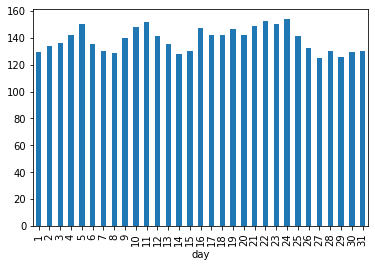

In [15]:
train.groupby('day')['Count'].mean().plot.bar()


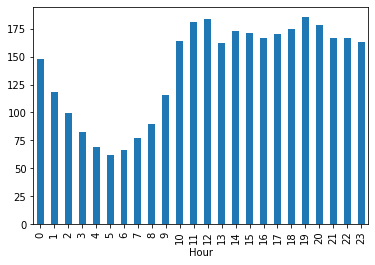

In [16]:
train.groupby('Hour')['Count'].mean().plot.bar()

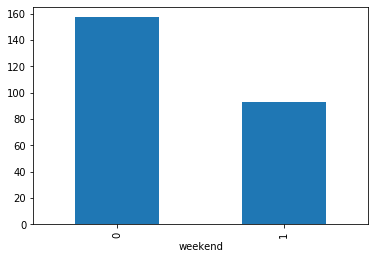

In [17]:
train.groupby('weekend')['Count'].mean().plot.bar()

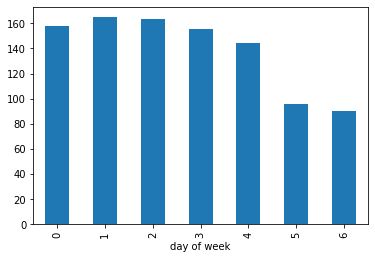

In [18]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [19]:
train= train.drop('ID',1)

In [20]:
train

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1
2012-08-25 05:00:00,2012-08-25 05:00:00,2,2012,8,25,5,5,1
2012-08-25 06:00:00,2012-08-25 06:00:00,2,2012,8,25,6,5,1
2012-08-25 07:00:00,2012-08-25 07:00:00,2,2012,8,25,7,5,1
2012-08-25 08:00:00,2012-08-25 08:00:00,6,2012,8,25,8,5,1


In [21]:

train.Timestamp= pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index= train.Timestamp
#Hourly timeseries
hourly= train.resample('H').mean()
#converting to daily mean
daily=train.resample('D').mean()
#converting to weekly mean
weekly= train.resample('W').mean()
#conveerting to monthly mean
monthly= train.resample('M').mean()

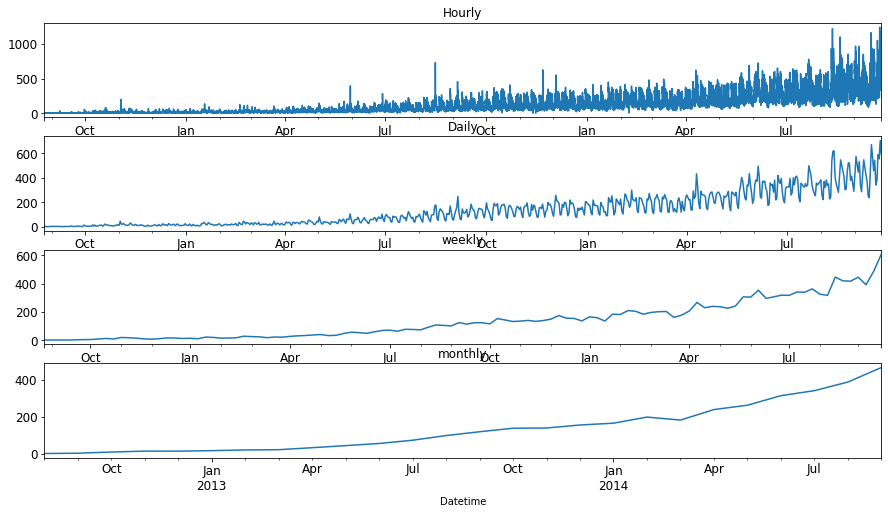

In [22]:

fig, axs= plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=12, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=12, ax=axs[1])
weekly.Count.plot(figsize=(15,8),title= 'weekly', fontsize=12, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title='monthly', fontsize=12, ax=axs[3])
plt.show()

In [23]:

test.Timestamp= pd.to_datetime(test.Datetime, format= '%d-%m-%Y %H:%M')
test.index=test.Timestamp


In [24]:
#converting to daily mean
test= test.resample('D').mean()

In [25]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

In [26]:
#Splitting the data into training and validation part

Train= train.ix['2012-08-25': '2014-06-24']
valid= train.ix['2014-06-25':'2014-09-25']

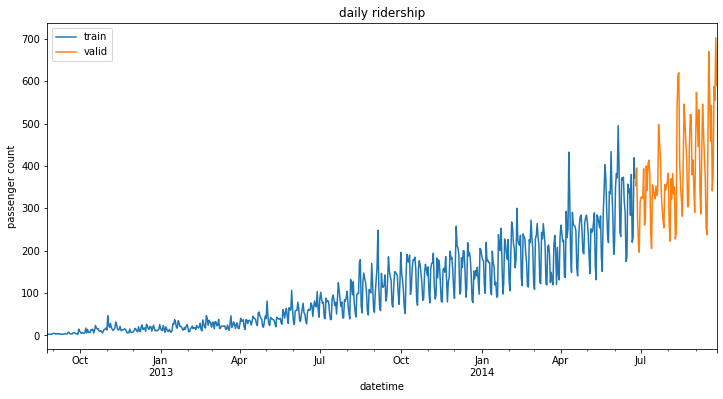

In [27]:

Train.Count.plot(figsize=(15,8), title= 'Daily ridership', fontsize=13, label='train')
valid.Count.plot(figsize=(12,6), title= 'daily ridership', fontsize=10, label='valid')
plt.xlabel("datetime")
plt.ylabel('passenger count')
plt.legend(loc='best')
plt.show()

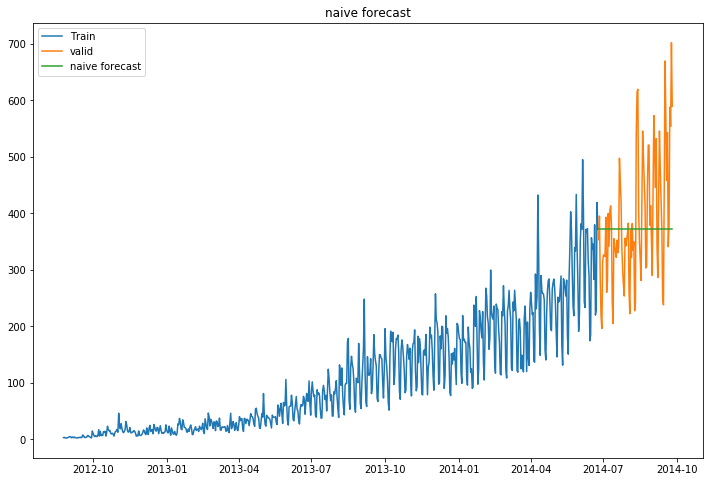

In [28]:
#Modeling Techniques
#i) Naive Approach

dd= np.asarray(Train.Count)
y_hat= valid.copy()
y_hat['naive']= dd[len(dd)-1]

plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label= 'Train')
plt.plot(valid.index, valid['Count'], label='valid')
plt.plot(y_hat.index, y_hat['naive'], label= 'naive forecast')
plt.legend(loc='best')
plt.title("naive forecast")
plt.show()

In [29]:

from sklearn.metrics import mean_squared_error
from math import sqrt

rms= sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


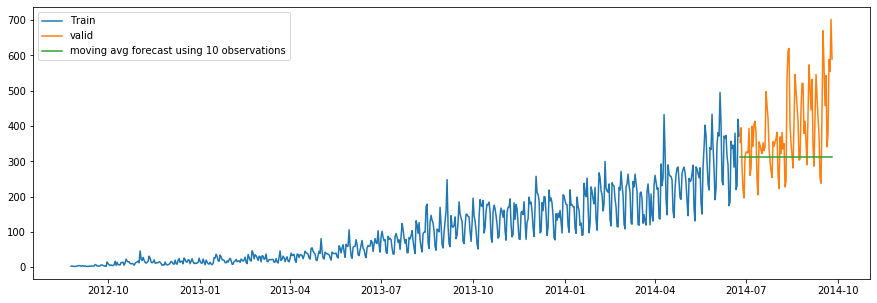

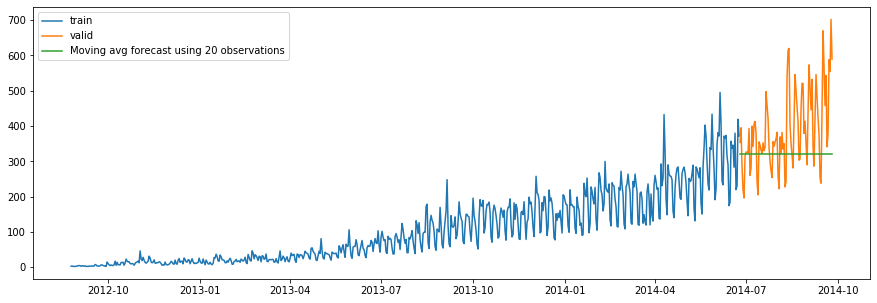

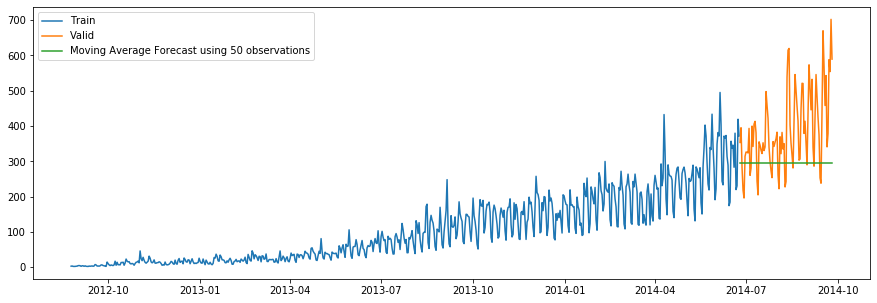

In [30]:
# ii) Moving Average


y_hat_avg= valid.copy()
y_hat_avg['moving_avg_forecast']= Train['Count'].rolling(10).mean().iloc[-1]  #avg of last 10 observations
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label= 'Train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='moving avg forecast using 10 observations')
plt.legend(loc='best')
plt.show()


y_hat_avg= valid.copy()
y_hat_avg['moving_avg_forecast']= Train['Count'].rolling(20).mean().iloc[-1] # avg of last 20 observations
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='train')
plt.plot(valid['Count'], label='valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving avg forecast using 20 observations')
plt.legend(loc='best')
plt.show()


y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [31]:
rms= sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986802


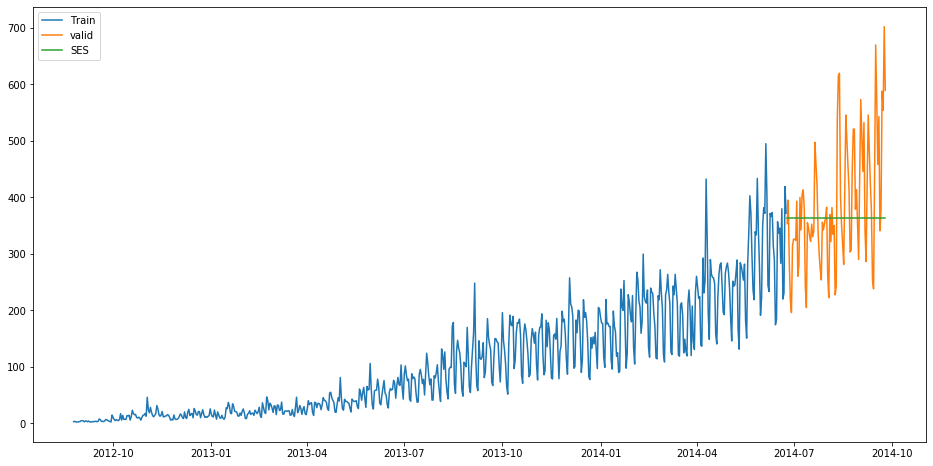

In [32]:
# iii) Simple Exponential Smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg= valid.copy()
fit2= SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, optimized= False)
y_hat_avg['SES']= fit2.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [33]:
rms= sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
rms

113.43708111884514

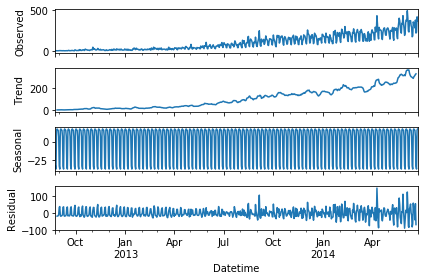

In [34]:
# iv) Holt’s Linear Trend Model

import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()

result= sm.tsa.stattools.adfuller(train.Count)
plt.show()

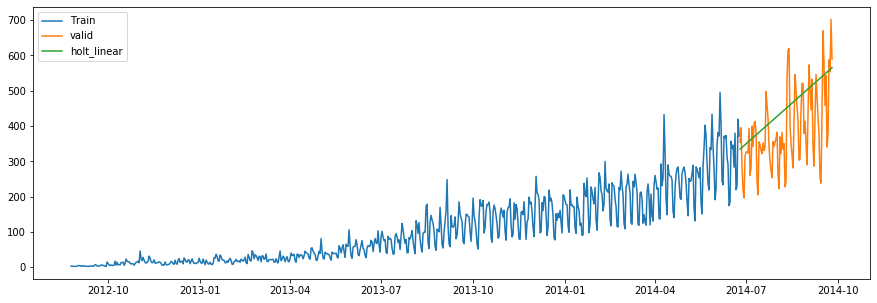

In [35]:

y_hat_avg= valid.copy()
fit1= Holt(np.asarray(Train['Count'])).fit(smoothing_level= 0.3, smoothing_slope=0.1)

y_hat_avg['Holt_linear']= fit1.forecast(len(valid))
plt.figure(figsize= (15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['Holt_linear'], label='holt_linear')
plt.legend(loc='best')
plt.show()

In [36]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

112.94278345314041


In [37]:
#3) Holt’s Linear Trend Model on daily time series

predict=fit1.forecast(len(test))

In [38]:
test['prediction']=predict
# Calculating the hourly ratio of count 
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

# Grouping the hourly ratio 
temp= train_original.groupby(['Hour'])['ratio'].sum()

In [39]:


# Groupby to csv format 
import pandas as pd

pd.DataFrame(temp, columns=['Hour', 'ratio']).to_csv('GROUPby.csv')
temp2= pd.read_csv("GROUPby.csv")
temp2= temp2.drop("Hour.1",1)
 
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [40]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1)

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

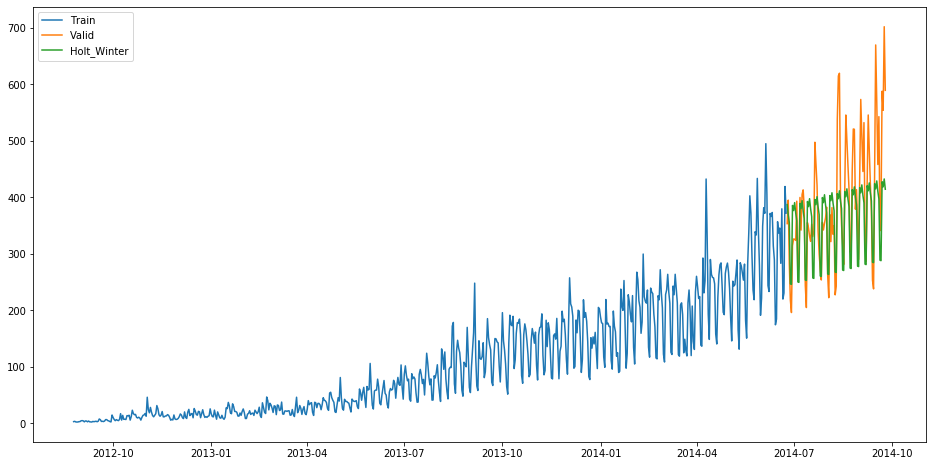

In [41]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 

plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [42]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 
print(rms)

82.38041226792582


In [43]:
predict=fit1.forecast(len(test))

In [44]:
test['prediction']=predict

# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [45]:
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

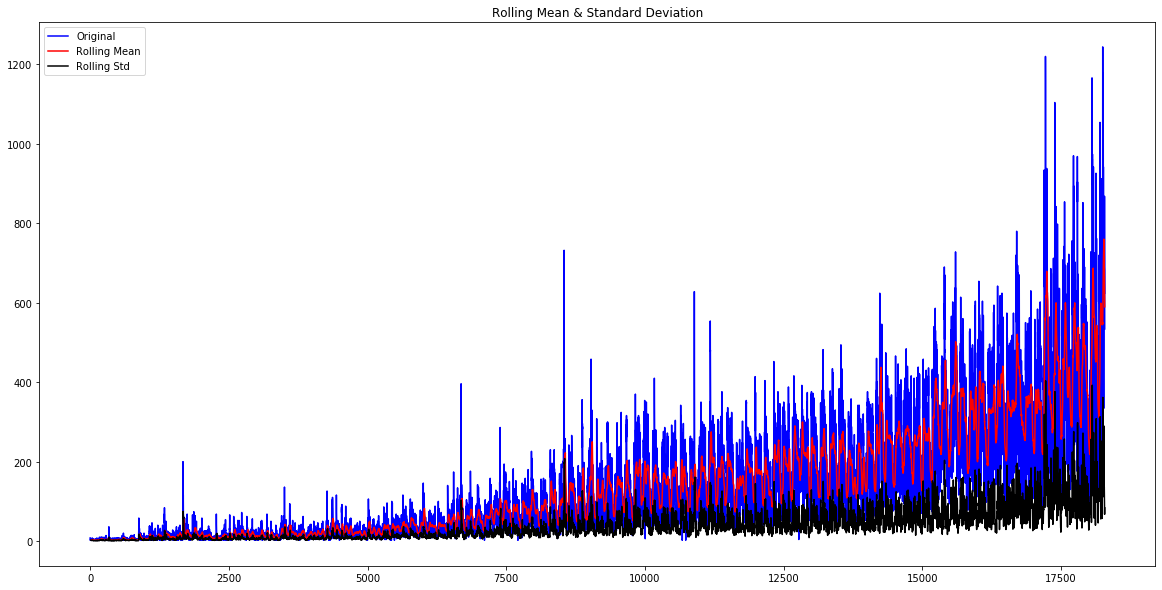

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [46]:
from statsmodels.tsa.stattools import adfuller 

def test_stationarity(timeseries):
        #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    #rolstd = pd.rolling_std(timeseries, window=24)
    
    rolmean = pd.Series(timeseries).rolling(window=24).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std() 
    
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

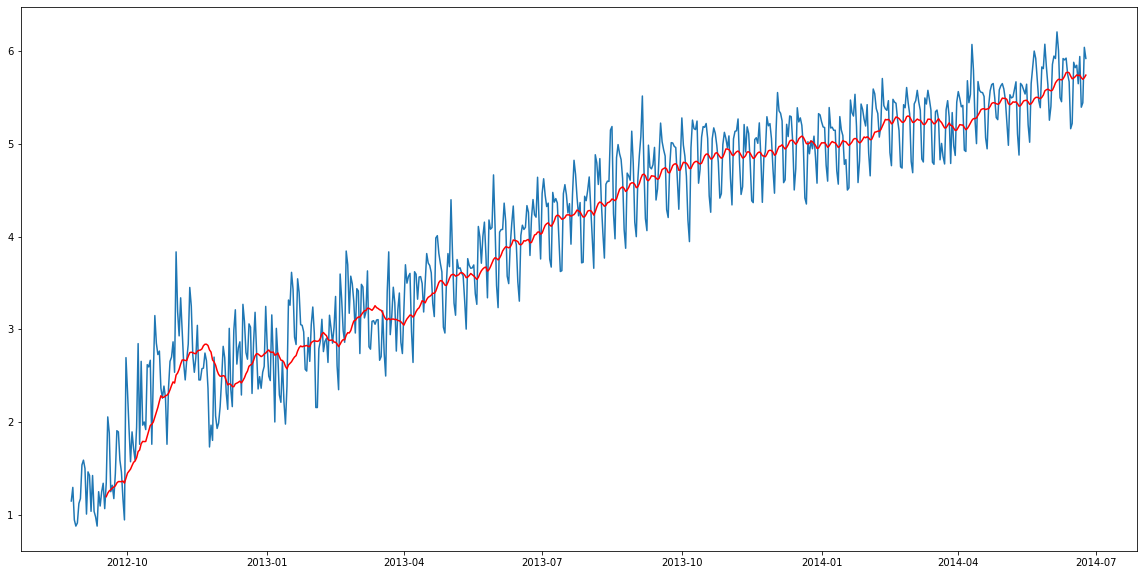

In [47]:
Train_log = np.log(Train['Count']) 
valid_log = np.log(valid['Count'])
#moving_avg = pd.rolling_mean(Train_log, 24)
moving_avg = pd.Series(Train_log).rolling(window=24).mean()

plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [48]:
train_log_moving_avg_diff = Train_log - moving_avg

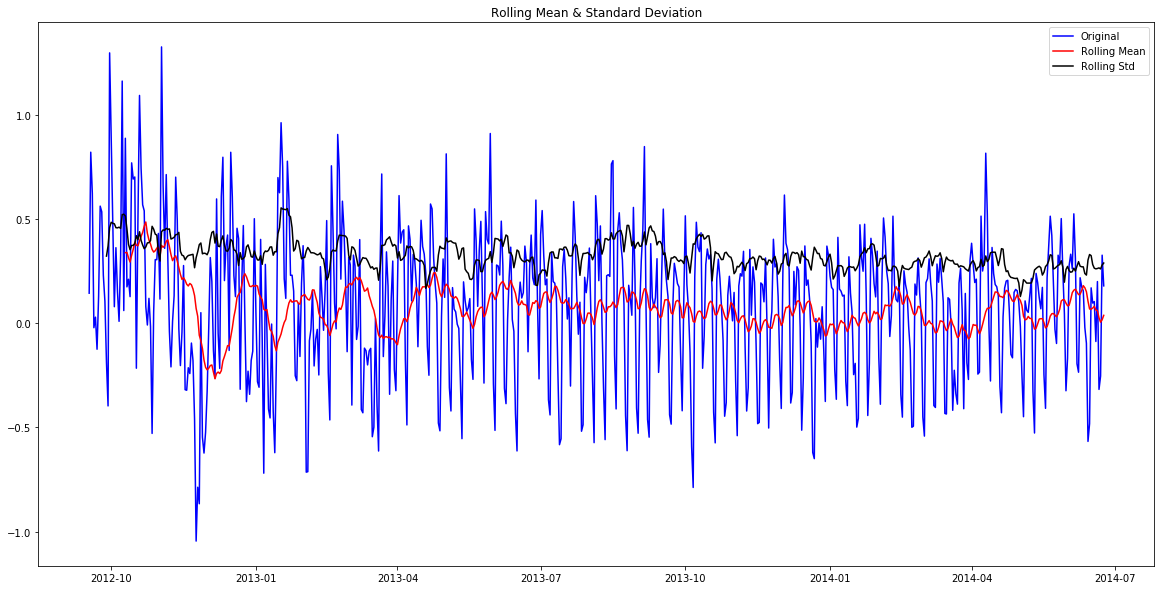

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [49]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

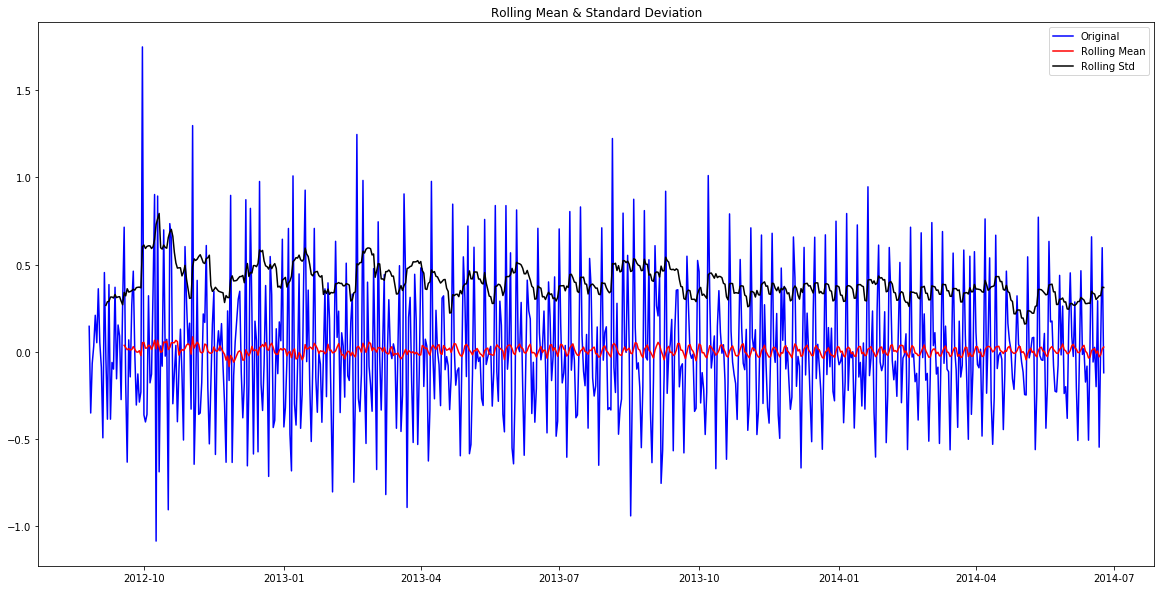

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [50]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

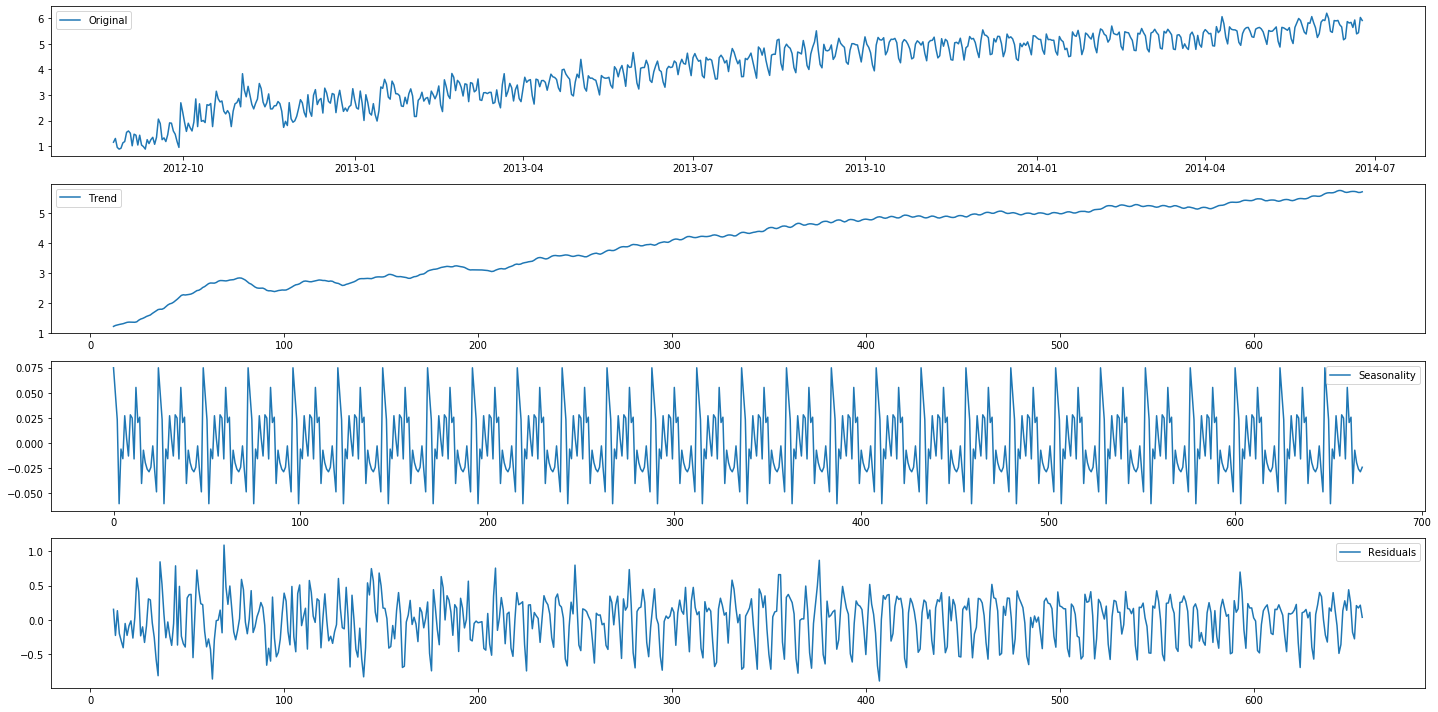

In [51]:
# Removing Seasonality

from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

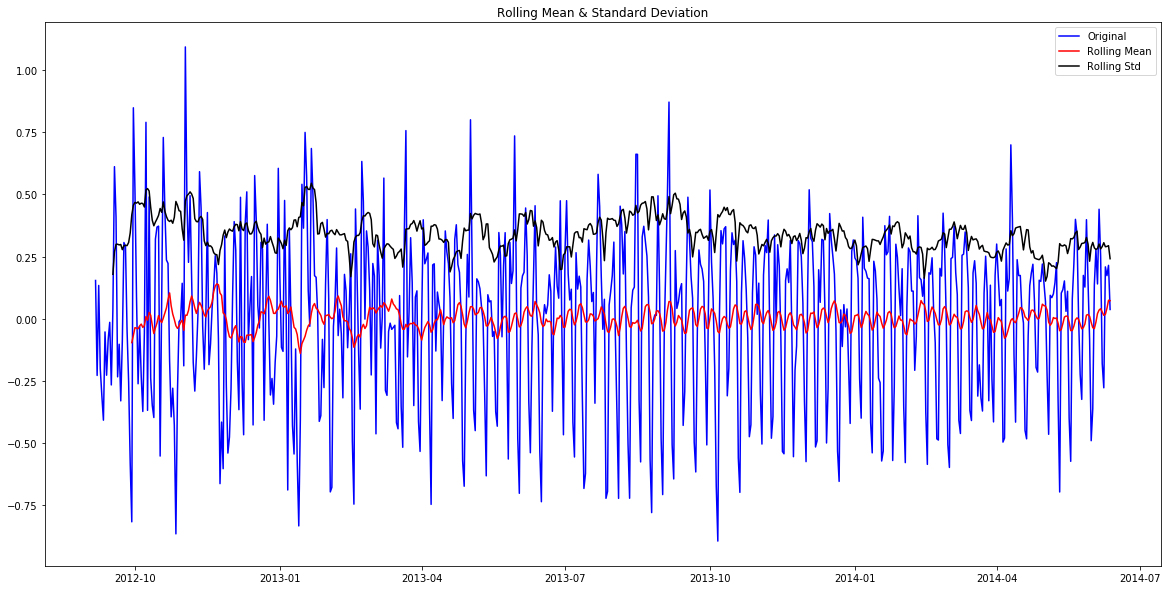

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [52]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True)

train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [53]:
from statsmodels.tsa.stattools import acf, pacf 

lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

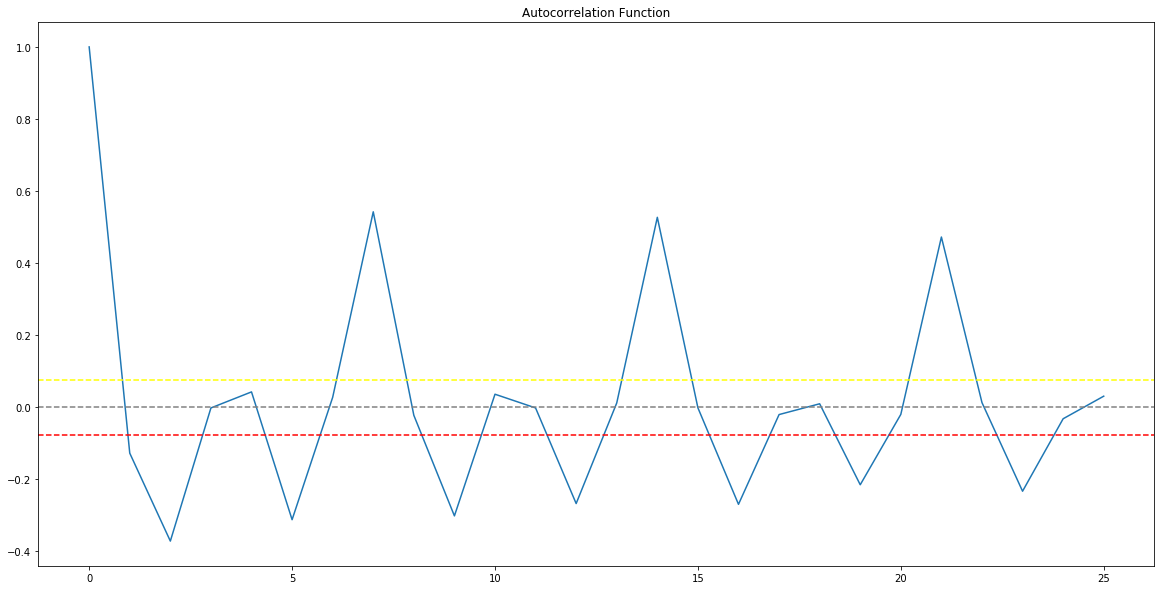

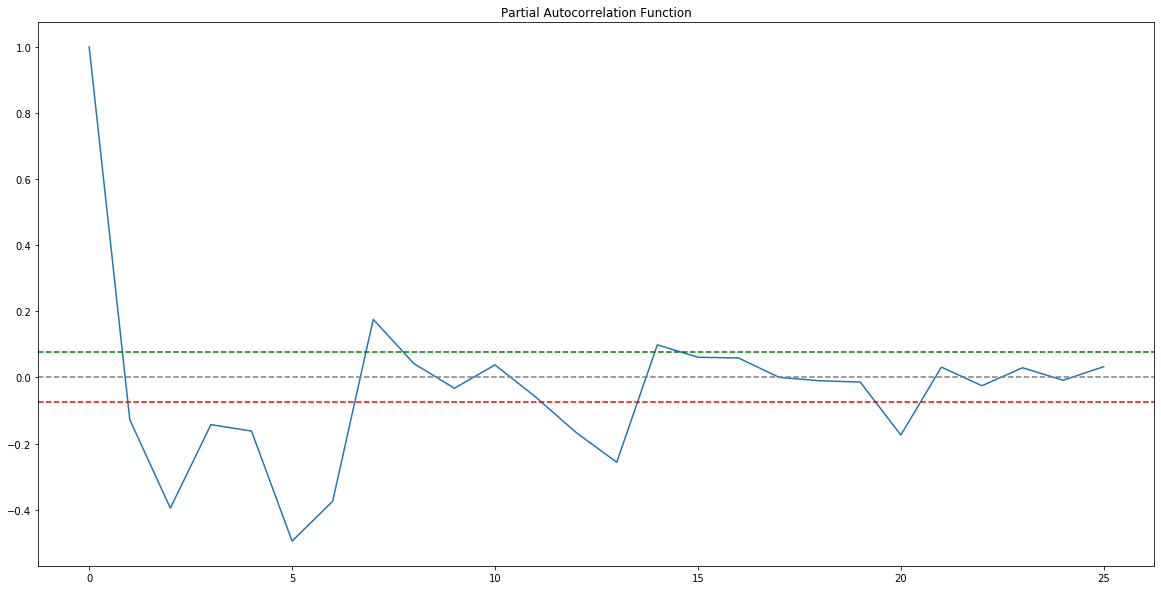

In [54]:
#ACF and PACF plot
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='yellow')
plt.title('Autocorrelation Function') 
plt.show() 

plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function') 
plt.show()

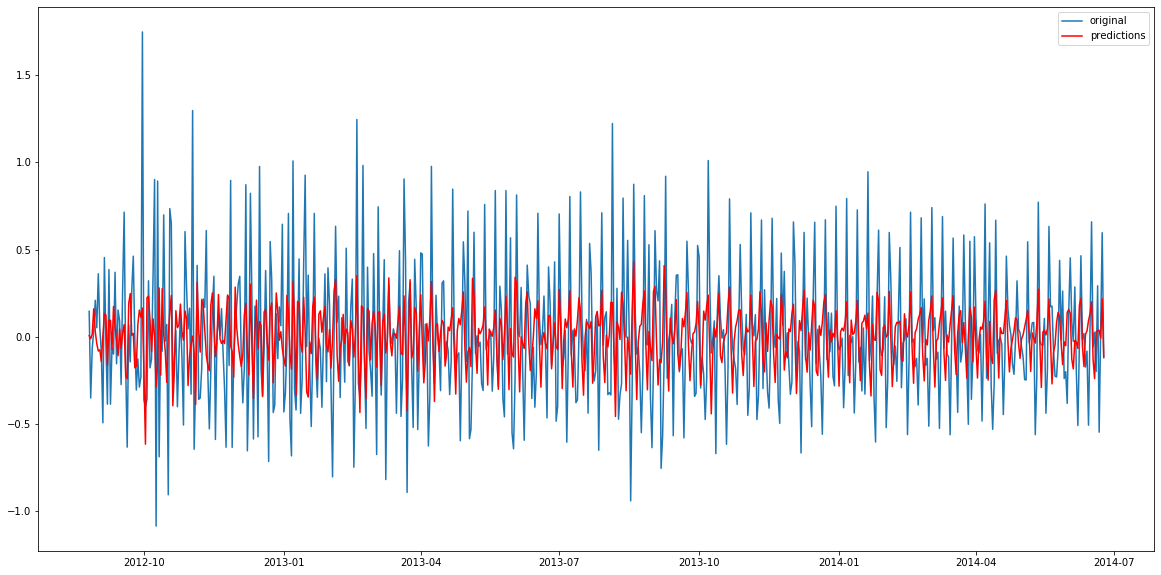

In [55]:
# AR model

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  

plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

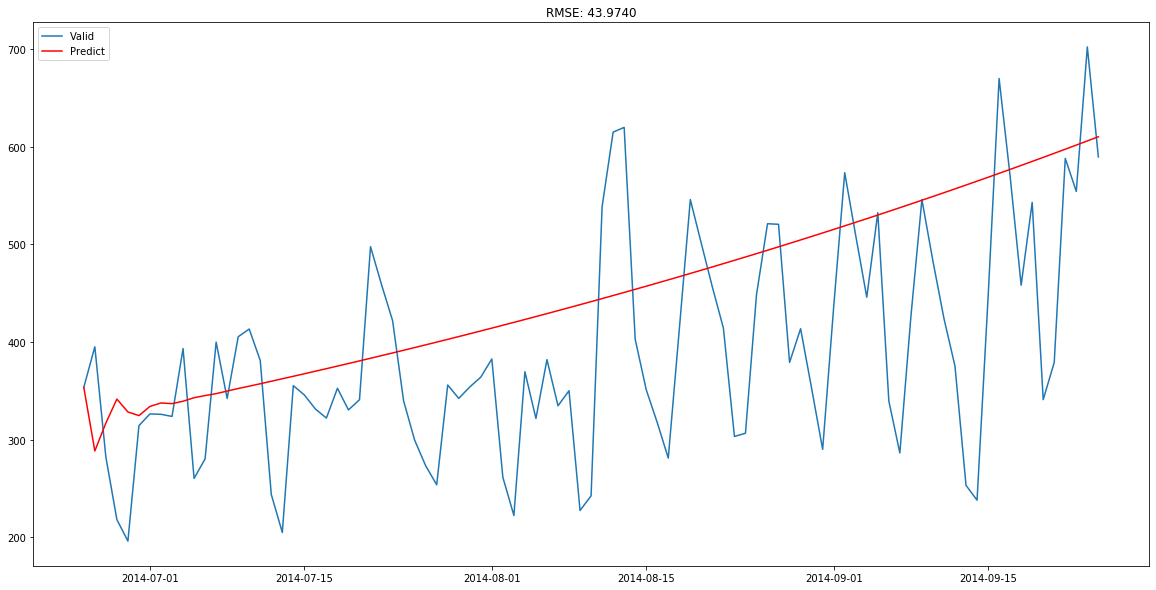

In [56]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25") 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)

plt.plot(valid['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0])) 
plt.show()

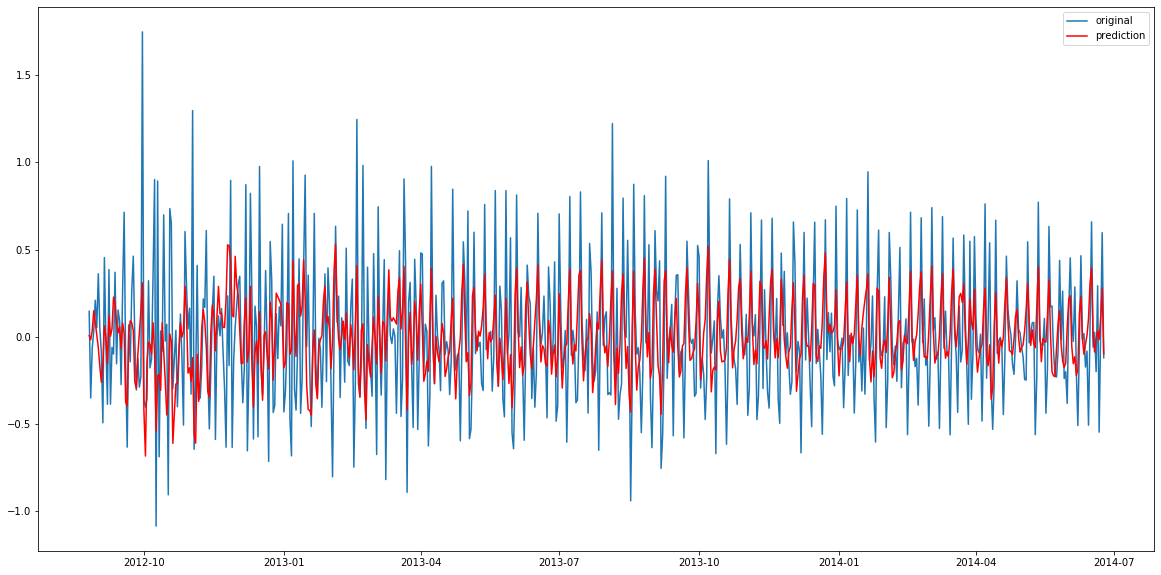

In [57]:
# MA model

model= ARIMA(Train_log, order=(0,1,2))  #here the p value is zero since it is just the MA model
results_MA= model.fit(disp= -1)

plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()


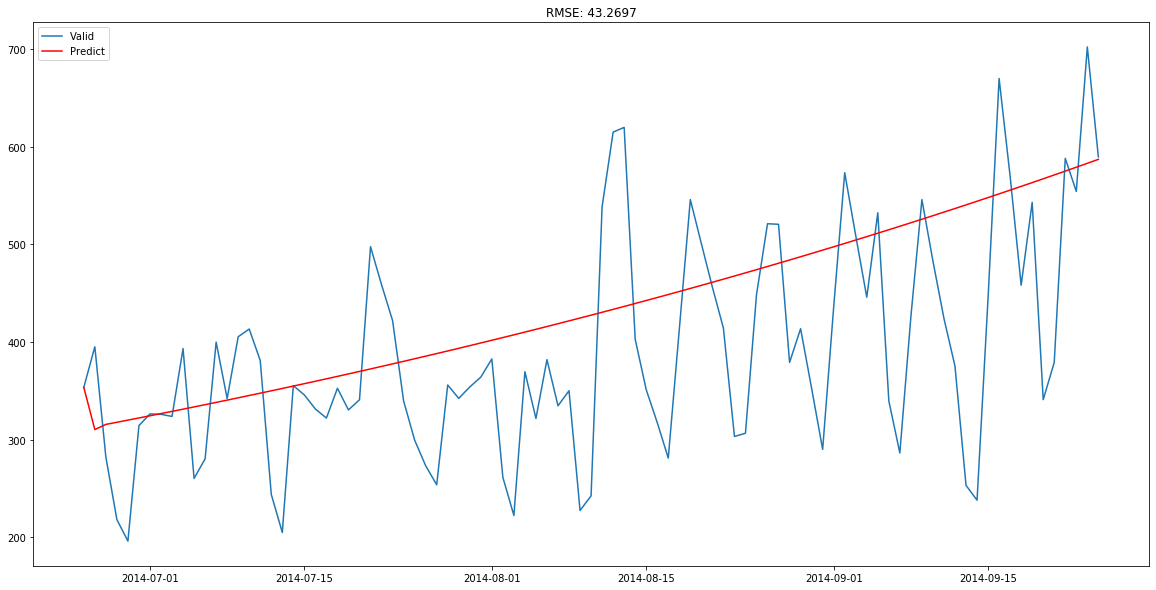

In [61]:

MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25") 
MA_predict=MA_predict.cumsum().shift().fillna(0) 
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
MA_predict1=MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)

plt.plot(valid['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

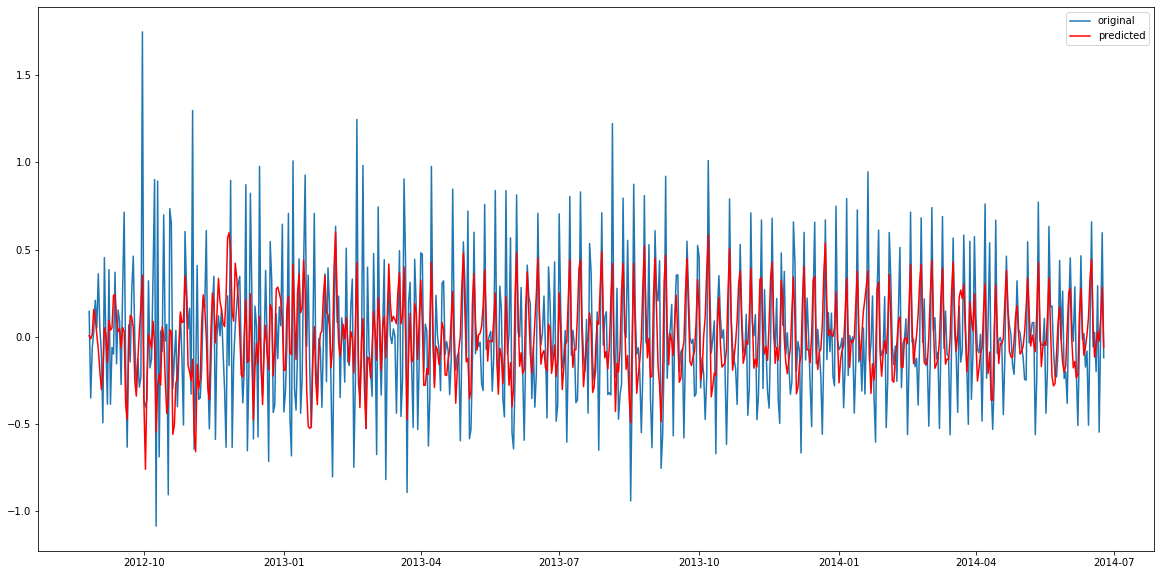

In [62]:
# Combined model

model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 

plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

In [63]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

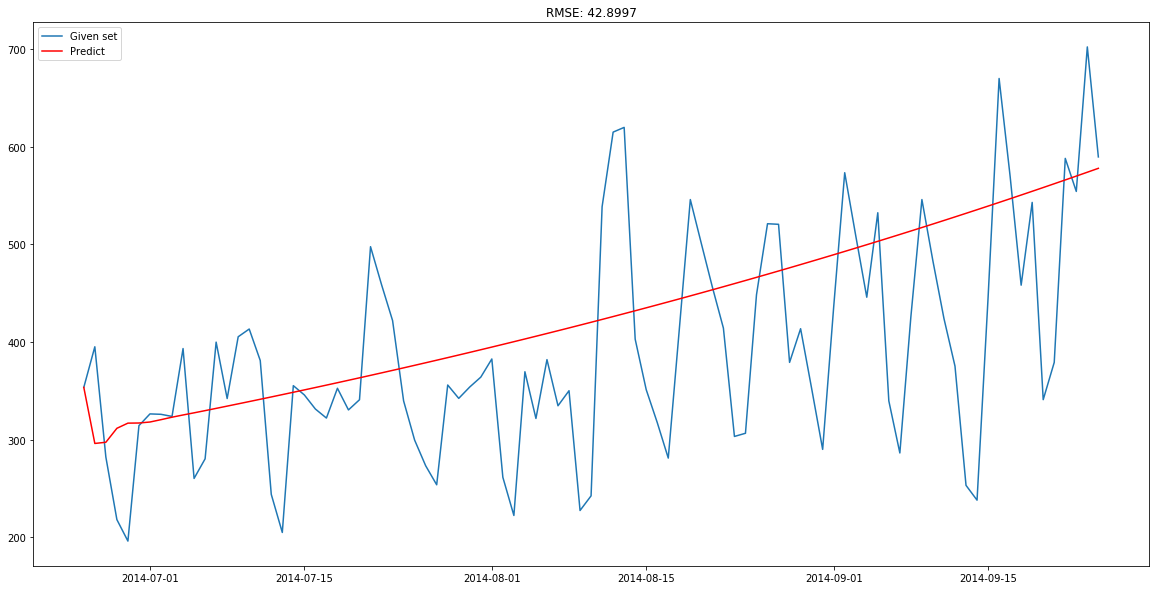

In [64]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, valid)

C:\Users\SAIKRISHNA PULIPATI\New folder\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


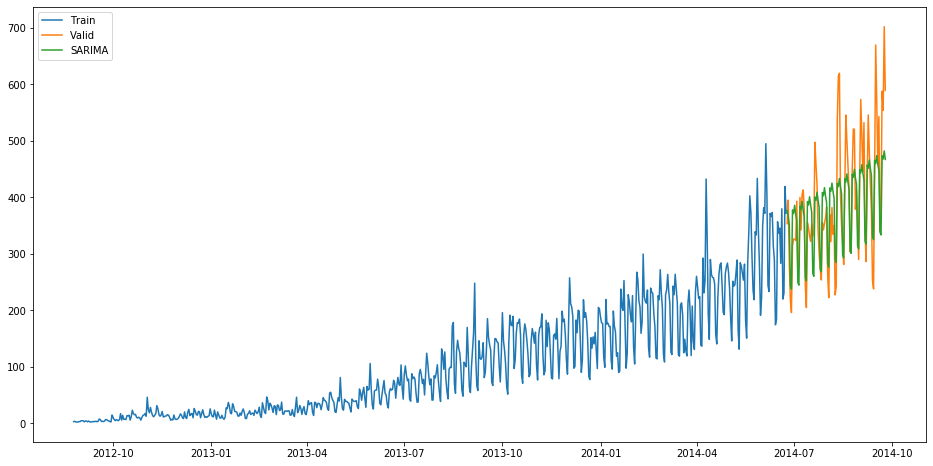

In [65]:
# SARIMAX model on daily time series

import statsmodels.api as sm

y_hat_avg = valid.copy() 
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 

plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

In [66]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA)) 
print(rms)

69.67242279085332


In [67]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

C:\Users\SAIKRISHNA PULIPATI\New folder\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [69]:
test['prediction']=predict

# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [70]:
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')